In [2]:
# Performed PCA then applied ML algortihm to show the diversfied ways to solve problems with optimal eroor rates.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

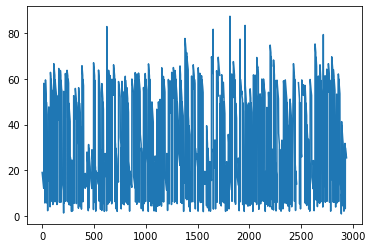

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Life Expectancy Data.csv')

df

df.info()

df.describe().transpose()

df.shape

def missing_values(df):
    missing = df.isnull().sum().sort_values(ascending=False)
    missing = missing[missing > 0]
    missing_percent = (missing/len(df))*100
    return pd.DataFrame({'Missing Values': missing, 'Missing Percentage': missing_percent})

missing_values(df)

def separate_features(df):
    categorical_features = df.select_dtypes(include='object').columns
    numerical_features = df.select_dtypes(exclude='object').columns
    return [categorical_features, numerical_features]

separate_features(df)

df.corr()['Life expectancy '].sort_values()

# Will drop Measels, Population, Year, due to very low correlation with life expectancy
df = df.drop(['Measles ','Population','Year'],axis=1)

# Fill these two columns - adult mortality and life expectancy,grouped by the country with mean or median 
df[df['Adult Mortality'].isnull()]

df[df['Diphtheria '].isnull()]

df[df['Country'] == 'Timor-Leste']

# The rows of South Sudan have too many missing values and its a new country, hence dropping the rows.
df = df[df.Country != 'South Sudan']

missing_values(df)

# Fill polio and deptheria columns, by grouping according to the country and fill them with the mean

df[df[' BMI '].isnull()]

df[' BMI '].plot()

df[' thinness 5-9 years'].describe()

df[df['Country']=='Sudan']

# The whole Sudan coutnry has no data on BMI thinness and thickness, hence groupby them with Status and fill them 

df[' thinness  1-19 years'].mean()

# 'thinness of 5-9' is unnecessary as 'thinness 1-19' has the same info, hence will drop one column

df = df.drop(' thinness 5-9 years',axis=1)

missing_values(df)

df['Adult Mortality'] = df.groupby('Country')['Adult Mortality'].transform(lambda value: value.fillna(value.mean()))

df['Life expectancy '] = df.groupby('Country')['Life expectancy '].transform(lambda value: value.fillna(value.mean()))

df['Diphtheria '] = df.groupby('Country')['Diphtheria '].transform(lambda value: value.fillna(value.mean()))

df['Polio'] = df.groupby('Country')['Polio'].transform(lambda value: value.fillna(value.mean()))

df[' BMI '] = df.groupby('Status')[' BMI '].transform(lambda value: value.fillna(value.mean()))

df[' thinness  1-19 years'] = df.groupby('Status')[' thinness  1-19 years'].transform(lambda value: value.fillna(value.mean()))


separate_features(df)

missing_values(df)

df[df['Schooling'].isnull()].groupby('Country').describe().transpose()

df.groupby('Status').describe()['Schooling']

df.groupby('Status').describe()['Alcohol']

df.groupby('Status').describe()['Total expenditure']

# will groupby schooling with status and fill them with the mean, same with income compostiton, alcohol and total expenditure 
# same will be done with life expectancy and adult mortality as the missing values contain obscure countries with no mean 
df['Schooling'] = df.groupby('Status')['Schooling'].transform(lambda value: value.fillna(value.mean()))

df['Income composition of resources'] = df.groupby('Status')['Income composition of resources'].transform(lambda value: value.fillna(value.mean()))

df['Alcohol'] = df.groupby('Status')['Alcohol'].transform(lambda value: value.fillna(value.mean()))

df['Life expectancy '] = df.groupby('Status')['Life expectancy '].transform(lambda value: value.fillna(value.mean()))

df['Adult Mortality'] = df.groupby('Status')['Adult Mortality'].transform(lambda value: value.fillna(value.mean()))

df['Total expenditure'] = df.groupby('Status')['Total expenditure'].transform(lambda value: value.fillna(value.mean()))

missing_values(df)

df['Hepatitis B'].describe()

# hepatitis b has high standard deviation and has very low correlation with life expectancy, hence dropping it and dropping gdp
df = df.drop('Hepatitis B',axis=1)


df= df.drop('GDP',axis=1)

missing_values(df)

df

df['Country'].nunique()

df['Status'] = df['Status'].map({'Developing':0,'Developed':1})

df

df.groupby('Country').describe()['Life expectancy ']

df['Life expectancy '].describe()

grouped = df.groupby(['Country'])['Life expectancy '].mean()

df['Countries_target_encoded'] = df['Country'].map(grouped)

df

df.corr()

df = df.drop('Country',axis=1)

X = df.drop('Life expectancy ',axis=1)
y = df['Life expectancy ']

In [3]:
X

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,Income composition of resources,Schooling,Countries_target_encoded
0,0,263.0,62,0.01,71.279624,19.1,83,6.0,8.16,65.0,0.1,17.2,0.479,10.1,58.19375
1,0,271.0,64,0.01,73.523582,18.6,86,58.0,8.18,62.0,0.1,17.5,0.476,10.0,58.19375
2,0,268.0,66,0.01,73.219243,18.1,89,62.0,8.13,64.0,0.1,17.7,0.470,9.9,58.19375
3,0,272.0,69,0.01,78.184215,17.6,93,67.0,8.52,67.0,0.1,17.9,0.463,9.8,58.19375
4,0,275.0,71,0.01,7.097109,17.2,97,68.0,7.87,68.0,0.1,18.2,0.454,9.5,58.19375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,723.0,27,4.36,0.000000,27.1,42,67.0,7.13,65.0,33.6,9.4,0.407,9.2,50.48750
2934,0,715.0,26,4.06,0.000000,26.7,41,7.0,6.52,68.0,36.7,9.8,0.418,9.5,50.48750
2935,0,73.0,25,4.43,0.000000,26.3,40,73.0,6.53,71.0,39.8,1.2,0.427,10.0,50.48750
2936,0,686.0,25,1.72,0.000000,25.9,39,76.0,6.16,75.0,42.1,1.6,0.427,9.8,50.48750


In [5]:
from sklearn.decomposition import PCA

In [12]:
explained_Varaince = []
for n in range(1,16):
    
    pca_mod = PCA(n_components=n)
    pca_mod.fit_transform(X)
    explained_Varaince.append(np.sum(pca_mod.explained_variance_ratio_))

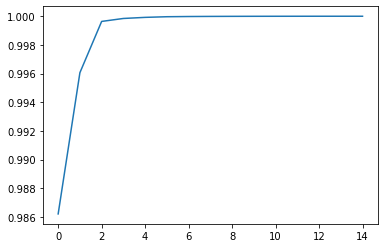

In [13]:
plt.plot(range(0,15),explained_Varaince)

In [44]:
# Selecting the optimal number of n_components 
pca_mod = PCA(n_components=7)
dataset = pca_mod.fit_transform(X)

In [45]:
pca_mod.explained_variance_ratio_

array([9.86211379e-01, 9.85239608e-03, 3.57500169e-03, 2.06180258e-04,
       7.65233380e-05, 4.49360708e-05, 1.44320724e-05])

In [46]:
y.shape

(2922,)

In [74]:
# applying ML algortihm after going through PCA
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200,n_jobs=-1)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.25, random_state=42)

In [50]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [51]:
preds = rfr.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [53]:
mae = mean_absolute_error(y_test,preds)

In [54]:
mae

1.526002975376197

In [55]:
mean_squared_error(y_test,preds)**0.5

2.1498667977854384

In [56]:
mae/np.mean(y)*100

2.201959282230797

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [75]:
error_Perc_train = []
error_Perc_test = []
for n in range(1,16):
    pca_mod = PCA(n_components=n)
    dataset = pca_mod.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.25, random_state=42)
    
    scaled_xtrain = scaler.fit_transform(X_train)
    scaled_xtest = scaler.transform(X_test)
    
    rfr.fit(X_train,y_train)
    
    train_preds = rfr.predict(X_train)
    train_mae = mean_absolute_error(y_train,train_preds)
    error_Perc_train.append(train_mae/np.mean(y)*100)
    
    preds = rfr.predict(X_test)
    test_mae = mean_absolute_error(y_test,preds)
    error_Perc_test.append(test_mae/np.mean(y)*100)
    

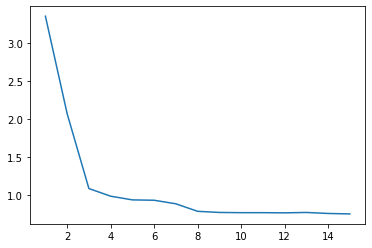

In [76]:
plt.plot(range(1,16),error_Perc_train)

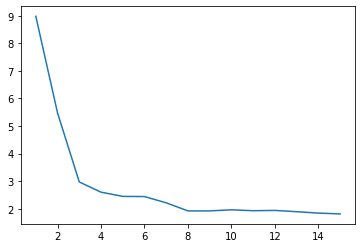

In [77]:
plt.plot(range(1,16),error_Perc_test)

In [78]:
error_Perc_train

[3.3505124048017665,
 2.0670329027528376,
 1.0820774319932447,
 0.9812091665742907,
 0.932659591749709,
 0.9278275637658272,
 0.8811236653674716,
 0.7822015335662313,
 0.7672638177831772,
 0.7643695201528006,
 0.7643717801953841,
 0.7619061663501131,
 0.7672176361893734,
 0.7538268643983496,
 0.7479263540845036]

In [79]:
error_Perc_test

[8.979019067297479,
 5.473388949408569,
 2.968779881382372,
 2.598479050019505,
 2.4455429478160386,
 2.4388907247577,
 2.2123385477973865,
 1.9179539881947112,
 1.919131556907653,
 1.9586411242555508,
 1.9263265648731283,
 1.935802531626227,
 1.890576253280612,
 1.839576229480977,
 1.8097813647759526]

In [ ]:
# Performed PCA then applied ML algortihm to show the diversfied ways to solve problems with optimal eroor rates.